## Compare Data Completeness Over Time

**Description**: Analyze the trend of missing data in `"sales_data.csv"` over several months stored in a "date" column. Visualize missing data rates by month.

In [3]:
# Write your code from here

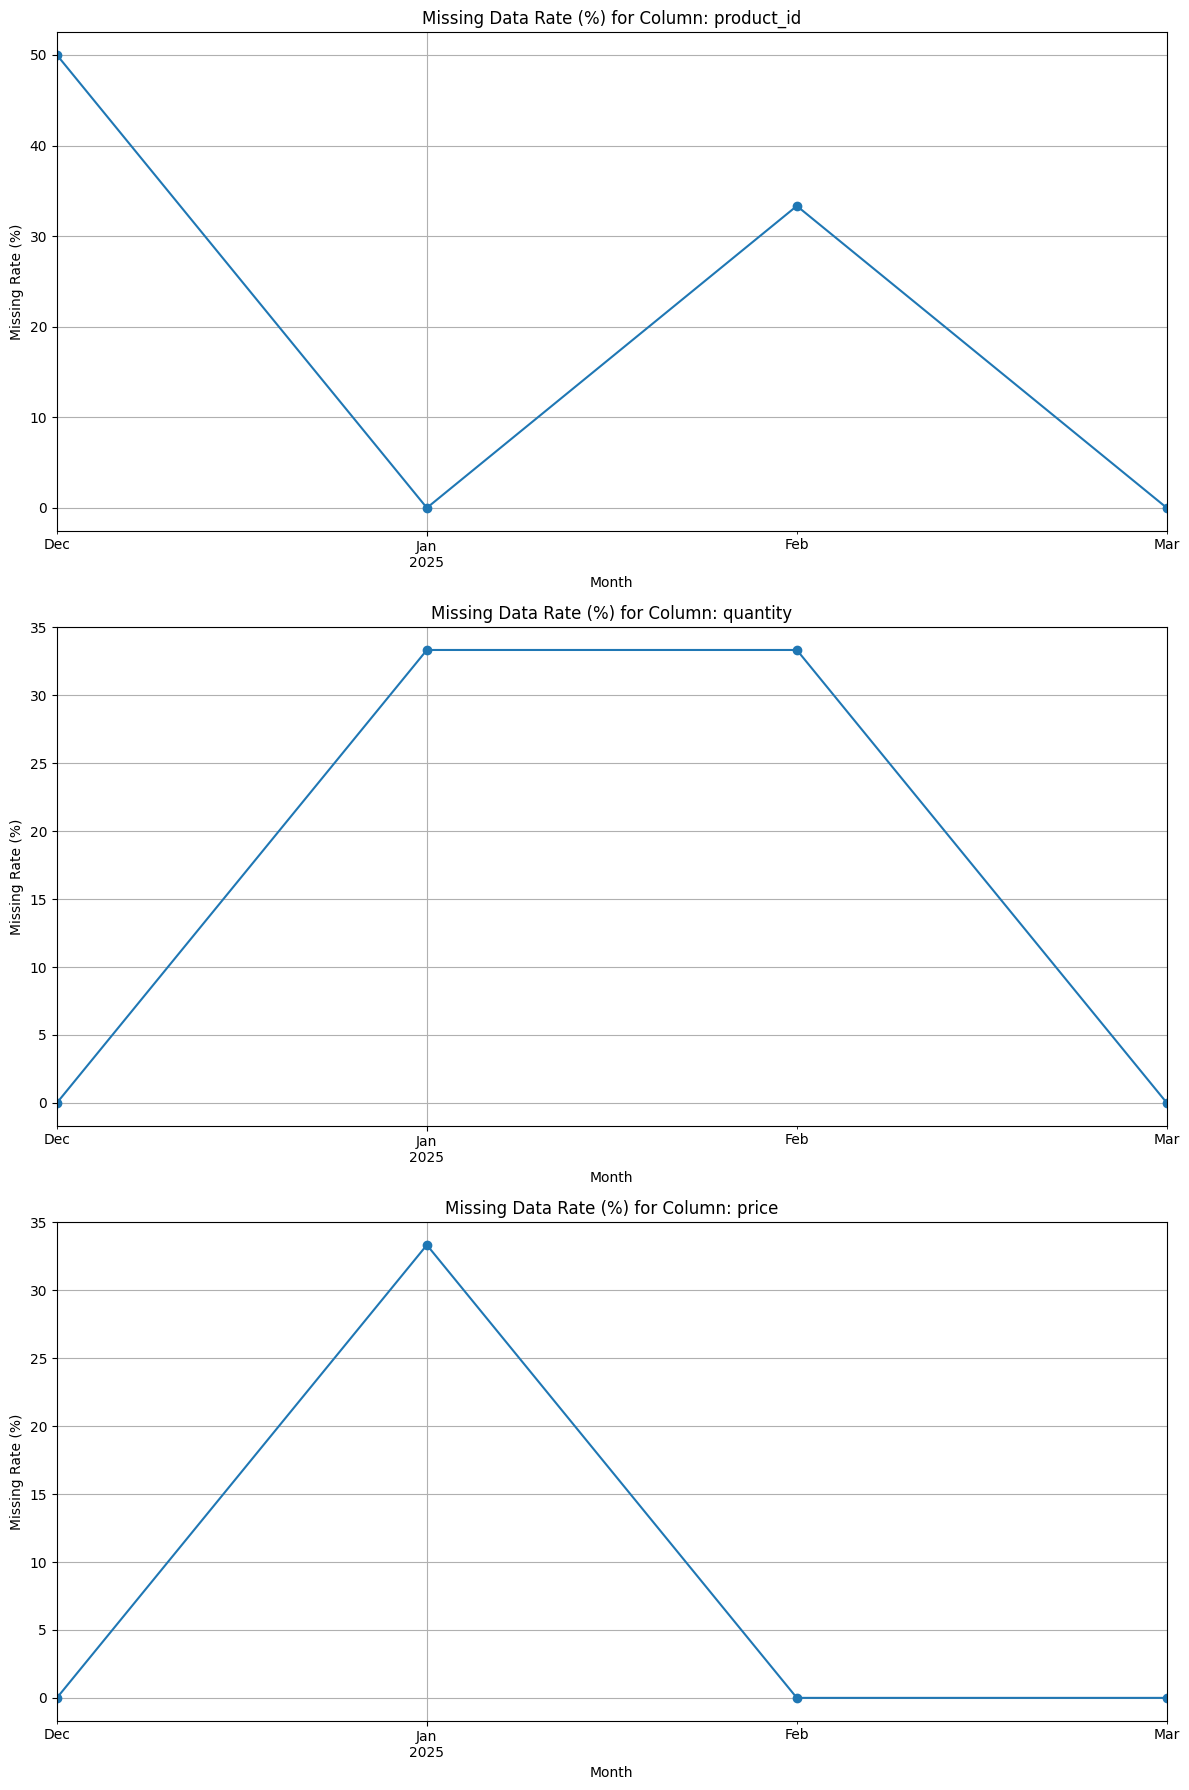

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_missing_data_trend(file_path, date_column):
    """
    Analyzes the trend of missing data in a CSV file over time, based on a date column.
    Visualizes the missing data rates per month for each column.

    Args:
        file_path (str): Path to the CSV file containing the sales data.
        date_column (str): Name of the column containing the date information.
    """
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError as e:
        print(f"Error: File not found: {e}")
        return

    if date_column not in df.columns:
        print(f"Error: Date column '{date_column}' not found.")
        return

    # Convert the date column to datetime objects
    df[date_column] = pd.to_datetime(df[date_column])

    # Set the date column as the index for easier resampling
    df.set_index(date_column, inplace=True)

    # Resample the data by month and calculate the percentage of missing values for each column
    missing_rate_by_month = df.resample('M').apply(lambda x: (x.isnull().sum() / len(x)) * 100)

    # Visualize the missing data rates for each column over time
    plt.figure(figsize=(12, 6 * len(df.columns)))
    for i, column in enumerate(df.columns):
        plt.subplot(len(df.columns), 1, i + 1)
        missing_rate_by_month[column].plot(kind='line', marker='o')
        plt.title(f'Missing Data Rate (%) for Column: {column}')
        plt.xlabel('Month')
        plt.ylabel('Missing Rate (%)')
        plt.grid(True)
    plt.tight_layout()
    plt.show()

# Create a dummy CSV file with missing sales data over a few months
data = {
    'date': pd.to_datetime(['2024-12-15', '2024-12-20', '2025-01-05', '2025-01-10', '2025-01-25',
                           '2025-02-01', '2025-02-18', '2025-02-28', '2025-03-10', '2025-03-22']),
    'product_id': [1, None, 2, 1, 3, 2, None, 1, 3, 2],
    'quantity': [10, 5, None, 8, 12, 7, 9, None, 15, 11],
    'price': [100.0, 50.0, 25.0, 100.0, None, 25.0, 50.0, 100.0, 25.0, 50.0]
}
sales_df = pd.DataFrame(data)
sales_df.to_csv('sales_data.csv', index=False)

# Analyze the trend of missing data
analyze_missing_data_trend('sales_data.csv', 'date')